In [3]:
import pandas as pd
from IPython.display import HTML, display

# Step 1: Create a DataFrame
data = {
    "Name": ['AliceAliceAliceAliceAliceAlice', 'Bob', 'Chris', 'David', 'Eva'],
    "Sales": [200, 150, 300, 250, 400]
}
df = pd.DataFrame(data)

# Step 2: Style the DataFrame with the specified customizations
styled_df = (
    df.style
    .set_table_styles([
        # Styles for the header with no background color
        {'selector': 'th', 'props': [
            ('background-color', 'white'),       # Match table body background
            ('font-weight', 'bold'),              # Bold text for header
            ('border', 'none'),                   # No border for headers
            ('padding', '4px'),                   # Less row height
            ('font-size', '12px'),                # Set font size
            ('text-align', 'left'),               # Align text to the left
        ]},
        # Add a less bold line below the header
        {'selector': 'thead th', 'props': [
            ('border-bottom', '1px solid black')  # Less bold line below header
        ]},
        # Styles for odd rows
        {'selector': 'tr:nth-child(odd)', 'props': [
            ('background-color', '#f2f2f2'),     # Grey background for odd rows
            ('border', 'none'),                   # No border for rows
        ]},
        # Styles for even rows
        {'selector': 'tr:nth-child(even)', 'props': [
            ('background-color', 'white'),       # White background for even rows
            ('border', 'none'),                  # No border for rows
        ]},
        # Styles for hover effect
        {'selector': 'tr:hover', 'props': [
            ('background-color', '#d9d9d9'),     # Darker grey on hover
            ('border', 'none'),                  # No border for rows
        ]},
        # Styles for all cells
        {'selector': 'td', 'props': [
            ('padding', '8px'),                  # More space for rows
            ('font-size', '14px'),               # Set font size (same as header)
            ('border', 'none'),                  # No border for cells
            ('text-align', 'left'),              # Align text to the left
        ]}
    ])
    .set_table_attributes('style="border-collapse: collapse; width: auto;"')  # Autofit column width
    .hide_index()
)

# Step 3: Render and display the styled DataFrame
html = styled_df.render()

# Optionally save the HTML to a file
with open('test.html', 'w') as f:
    f.write(html+'<br>'+html)

In [4]:
import markdown
from pathlib import Path
import re

# Your markdown string with three header levels
rendered_report_content = """
# Main Header
## Main Header v1
### Sub1
### Sub2
## Main Header v2
### Sub1
### Sub2
"""

# Convert Markdown to HTML
html_content = markdown.markdown(rendered_report_content)

# Generate unique IDs for headers in the HTML content and apply numbering to the headers
def assign_ids_and_numbers_to_headers(html):
    numbering = {}
    
    def add_id_and_number(match):
        header_tag = match.group(1)  # Get the header tag (e.g., h1, h2)
        header_text = match.group(2)  # Get the header text
        level = int(header_tag[1])    # Get the header level (e.g., 1 for h1)
        
        # Update numbering for the current level
        if level not in numbering:
            numbering[level] = 0
        for l in range(level + 1, 7):
            numbering.pop(l, None)  # Remove any lower-level numbering
        
        numbering[level] += 1  # Increment current level number

        # Create the numbering string
        number_str = '.'.join(str(numbering[l]) for l in range(1, level + 1))
        
        # Add number to the header text
        numbered_header_text = f"{number_str} {header_text}"
        
        # Generate header ID
        header_id = re.sub(r'[^a-zA-Z0-9]+', '-', header_text.strip().lower())
        
        return f"<{header_tag} id='{header_id}'>{numbered_header_text}</{header_tag}>"
    
    # Apply the function to all headers in the HTML content
    return re.sub(r'<(h[1-6])>(.*?)<\/\1>', add_id_and_number, html)

# Apply numbering and IDs to the headers in the HTML content
html_content_with_ids_and_numbers = assign_ids_and_numbers_to_headers(html_content)

# Generate Table of Contents with numbering
toc = ""
headers = re.findall(r'<(h[1-6]) id=\'(.*?)\'>(.*?)<\/\1>', html_content_with_ids_and_numbers)

for tag, header_id, title in headers:
    level = int(tag[1])  # Get the level of the header (h1, h2, etc.)
    indentation = 'margin-left: {}em;'.format(level - 1)
    toc += f'<li style="{indentation}"><a href="#{header_id}">{title}</a></li>\n'

# HTML template with TOC and adjusted header styles
html_template = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Rendered Report</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/bootswatch/4.5.2/lumen/bootstrap.min.css">
    <style>
        body {{
            font-family: Arial, sans-serif;
            padding: 20px;
        }}
        nav {{
            margin-bottom: 20px;
        }}
        h1 {{
            font-size: 2em;
            font-weight: bold;
        }}
        h2 {{
            font-size: 1.5em;
        }}
        h3 {{
            font-size: 1.2em;
        }}
    </style>
</head>
<body>
    <nav>
        <h1>Table of Contents</h1>
        <ul>{toc}</ul>
    </nav>
    {html_content_with_ids_and_numbers}
</body>
</html>
"""

# Write to HTML file
html_file_path = Path('rendered_report.html')
with html_file_path.open('w', encoding='utf-8') as f:
    f.write(html_template)

print(f"HTML file has been written to {html_file_path}")

HTML file has been written to rendered_report.html


In [5]:
display(HTML(html_template))

In [4]:
# Define the HTML content with a non-wrapping dynamic TOC
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Tabbed Interface with Responsive TOC</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            display: flex;
        }

        .toc {
            margin-right: 20px;
            padding: 10px;
            border: 1px solid #ccc;
            flex-shrink: 0;
            white-space: nowrap; /* Prevent wrapping */
        }

        .toc h3 {
            display: inline; /* Keep the title in one line */
            margin: 0;
        }

        .toc ul {
            padding: 0;
            margin: 0;
            list-style-type: none;
            display: inline; /* Keep the list inline */
        }

        .toc a {
            text-decoration: none;
            color: #007BFF;
            padding: 0 10px; /* Add padding between links */
        }

        .toc a:hover {
            text-decoration: underline;
        }

        .tabs {
            margin-bottom: 20px;
            flex-grow: 1;
        }

        .tab-button {
            background-color: #f1f1f1;
            border: none;
            padding: 10px 20px;
            cursor: pointer;
            margin-right: 5px;
        }

        .tab-button:hover {
            background-color: #ddd;
        }

        .tab-content {
            border: 1px solid #ccc;
            padding: 20px;
            width: 100%;
        }
    </style>
</head>
<body>
    <div class="toc" id="toc">
        <h3>Table of Contents:</h3>
        <ul id="toc-list"></ul>
    </div>

    <div class="tab-content">
        <div class="tabs">
            <button class="tab-button" onclick="showTab('tab1')">Tab 1</button>
            <button class="tab-button" onclick="showTab('tab2')">Tab 2</button>
            <button class="tab-button" onclick="showTab('tab3')">Tab 3</button>
        </div>

        <div id="tab1" class="tab" style="display: block;">
            <h2 id="tab1-header1">Content for Tab 1 - Header 1</h2>
            <p>This is the content for the first header in Tab 1.</p>
            <h2 id="tab1-header2">Content for Tab 1 - Header 2</h2>
            <p>This is the content for the second header in Tab 1.</p>
        </div>

        <div id="tab2" class="tab" style="display: none;">
            <h2 id="tab2-header1">Content for Tab 2 - Header 1</h2>
            <p>This is the content for the first header in Tab 2.</p>
            <h2 id="tab2-header2">Content for Tab 2 - Header 2</h2>
            <p>This is the content for the second header in Tab 2.</p>
        </div>

        <div id="tab3" class="tab" style="display: none;">
            <h2 id="tab3-header1">Content for Tab 3 - Header 1</h2>
            <p>This is the content for the first header in Tab 3.</p>
            <h2 id="tab3-header2">Content for Tab 3 - Header 2</h2>
            <p>This is the content for the second header in Tab 3.</p>
        </div>
    </div>

    <script>
        function showTab(tabId) {
            // Hide all tabs
            const tabs = document.querySelectorAll('.tab');
            tabs.forEach((tab) => {
                tab.style.display = 'none';
            });

            // Show the selected tab
            const selectedTab = document.getElementById(tabId);
            selectedTab.style.display = 'block';

            // Update the TOC
            updateTOC(tabId);
        }

        function updateTOC(tabId) {
            // Get the TOC element and clear its content
            const tocList = document.getElementById('toc-list');
            tocList.innerHTML = '';

            // Get the headers from the selected tab
            const headers = document.querySelectorAll(`#${tabId} h2`);
            let maxWidth = 0; // Variable to track the maximum width

            // Populate the TOC with headers
            headers.forEach((header) => {
                const listItem = document.createElement('li');
                const link = document.createElement('a');
                link.href = `#${header.id}`;
                link.textContent = header.textContent;

                listItem.appendChild(link);
                tocList.appendChild(listItem);

                // Calculate the width of the link and update maxWidth
                const linkWidth = link.getBoundingClientRect().width;
                if (linkWidth > maxWidth) {
                    maxWidth = linkWidth;
                }
            });

            // Set the TOC width based on the longest entry, with a minimum width
            const tocElement = document.getElementById('toc');
            tocElement.style.width = Math.max(maxWidth + 30, 150) + 'px'; // Adding some padding
        }

        // Initialize the TOC for the first tab on page load
        document.addEventListener('DOMContentLoaded', () => {
            updateTOC('tab1');
        });
    </script>
</body>
</html>
"""

# Save the HTML content to a file
with open("tabs_with_single_line_toc.html", "w") as file:
    file.write(html_content)

print("HTML file 'tabs_with_single_line_toc.html' has been created.")

HTML file 'tabs_with_single_line_toc.html' has been created.


HTML file saved as 'plot.html'


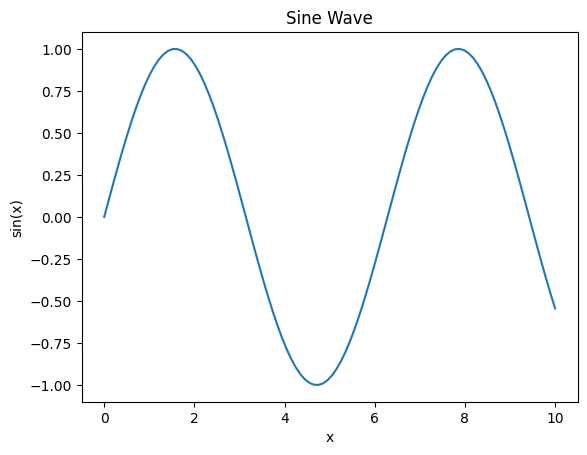

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import io
import base64

# Step 1: Create some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Step 2: Create a Matplotlib plot
plt.figure()
plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')

# Step 3: Save the figure to a BytesIO stream
buf = io.BytesIO()
plt.savefig(buf, format='png')  # Save as PNG
buf.seek(0)  # Rewind the buffer to the beginning

# Step 4: Convert the PNG to base64 encoding
img_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
img_tag = f'<img src="data:image/png;base64,{img_base64}"/>'

# Step 5: Create HTML content and save to a file
html_content = f'''
<!DOCTYPE html>
<html>
<head>
    <title>Matplotlib Figure</title>
</head>
<body>
    <h1>Sine Wave Plot</h1>
    {img_tag}
</body>
</html>
'''

# Save the HTML to a file
with open('plot.html', 'w') as f:
    f.write(html_content)

print("HTML file saved as 'plot.html'")

'\n<!DOCTYPE html>\n<html>\n<head>\n    <title>Matplotlib Figure</title>\n</head>\n<body>\n    <h1>Sine Wave Plot</h1>\n    \n</body>\n</html>\n'
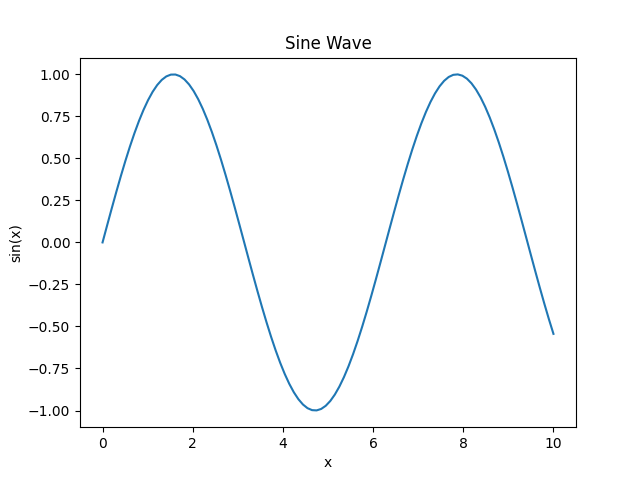

In [6]:
html_content

In [7]:
html_content_with_ids

"<h1 id='main-header'>Main Header</h1>\n<p>This is some introductory text for the main header.</p>"

In [8]:
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>TOC with Tabsb</title>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
    <style>
        body {
            display: flex;
            margin: 0;
            height: 100vh; /* Full viewport height */
        }
        .toc {
            position: fixed;
            left: 0;
            height: calc(100% - 60px); /* Adjust height to account for the fixed header */
            overflow-y: auto;
            background-color: #f8f9fa;
            padding: 10px 20px;
            white-space: nowrap;
        }
        .content {
            padding: 20px; /* Space around content */
            padding-top: 20px; /* Additional padding at the top */
            transition: transform 0.3s ease; /* Smooth transition for transform */
        }
        .logo {
            width: 100px; /* Set logo width */
            margin-bottom: 20px; /* Space below the logo */
        }
        .tab-content{
            overflow: scroll;
            max-height: 90vh;
        }
    </style>
</head>
<body>

<div class="toc" id="toc">
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/61/Goldman_Sachs.svg" alt="Goldman Sachs Logo" class="logo">
    <h5>Table of Contents</h5>
    <ul id="tocList" class="nav flex-column"></ul>
    <h2>Header One</h2>
    <h3>Subheader One</h3>
    <h4>Sub-subheader One</h4>
    <div class="chart" id="chart1">[Chart 1]</div>
    <h2>Header Two</h2>
    <h3>Subheader Two</h3>
    <h4>Sub-subheader Two</h4>
    <div class="chart" id="chart2">[Chart 2]</div>
    <h2>Header Three</h2>
    <h3>Subheader Three</h3>
    <h4>Sub-subheader Three</h4>
</div>

<div class="content" id="content">
    <ul class="nav nav-tabs" id="myTab" role="tablist">
        <li class="nav-item">
            <a class="nav-link active" id="tab1-tab" data-toggle="tab" href="#tab1" role="tab">Tab 1</a>
        </li>
        <li class="nav-item">
            <a class="nav-link" id="tab2-tab" data-toggle="tab" href="#tab2" role="tab">Tab 2</a>
        </li>
    </ul>
    <div class="tab-content" id="myTabContent">
        <div class="tab-pane fade show active" id="tab1" role="tabpanel">
            <h2>Header One</h2>
            <h3>Subheader One</h3>
            <h4>Sub-subheader One</h4>
            <div class="chart" id="chart1">[Chart 1]</div>
            <h2>Header Two</h2>
            <h3>Subheader Two</h3>
            <h4>Sub-subheader Two</h4>
            <div class="chart" id="chart2">[Chart 2]</div>
            <h2>Header Three</h2>
            <h3>Subheader Three</h3>
            <h4>Sub-subheader Three</h4>
            <div class="chart" id="chart3">[Chart 3]</div>
                        <h2>Header One</h2>
            <h3>Subheader One</h3>
            <h4>Sub-subheader One</h4>
            <div class="chart" id="chart1">[Chart 1]</div>
            <h2>Header Two</h2>
            <h3>Subheader Two</h3>
            <h4>Sub-subheader Two</h4>
            <div class="chart" id="chart2">[Chart 2]</div>
            <h2>Header Three</h2>
            <h3>Subheader Three</h3>
            <h4>Sub-subheader Three</h4>
            <div class="chart" id="chart3">[Chart 3]</div>
                        <h2>Header One</h2>
            <h3>Subheader One</h3>
            <h4>Sub-subheader One</h4>
            <div class="chart" id="chart1">[Chart 1]</div>
            <h2>Header Two</h2>
            <h3>Subheader Two</h3>
            <h4>Sub-subheader Two</h4>
            <div class="chart" id="chart2">[Chart 2]</div>
            <h2>Header Three</h2>
            <h3>Subheader Three</h3>
            <h4>Sub-subheader Three</h4>
            <div class="chart" id="chart3">[Chart 3]</div>
                        <h2>Header One</h2>
            <h3>Subheader One</h3>
            <h4>Sub-subheader One</h4>
            <div class="chart" id="chart1">[Chart 1]</div>
            <h2>Header Two</h2>
            <h3>Subheader Two</h3>
            <h4>Sub-subheader Two</h4>
            <div class="chart" id="chart2">[Chart 2]</div>
            <h2>Header Three</h2>
            <h3>Subheader Three</h3>
            <h4>Sub-subheader Three</h4>
            <div class="chart" id="chart3">[Chart 3]</div>
        </div>
        <div class="tab-pane fade" id="tab2" role="tabpanel">
            <h2>Header A</h2>
            <h3>Subheader A</h3>
            <h4>Sub-subheader A</h4>
            <div class="chart" id="chart4">[Chart 4]</div>
            <h2>Header B</h2>
            <h3>Subheader B</h3>
            <h4>Sub-subheader B</h4>
            <div class="chart" id="chart5">[Chart 5]</div>
            <h2>Header C</h2>
            <h3>Subheader C</h3>
            <h4>Sub-subheader C</h4>
            <div class="chart" id="chart6">[Chart 6]</div>
        </div>
    </div>
</div>

<script src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
<script src="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js"></script>
<script>
    function adjustTOCWidth() {
        let maxWidth = 0;

        // Get all headings in the TOC to calculate max width
        $('#toc h2, #toc h3, #toc h4').each(function () {
            let width = $(this)[0].scrollWidth; // Get the natural width of the heading text
            if (width > maxWidth) {
                maxWidth = width;
            }
        });
        
        maxWidth = maxWidth + 40;

        $('#toc').css('width', maxWidth +'px'); // Set TOC width
        $('#content').css('transform', 'translateX(' + maxWidth + 'px)'); 
        $("#content").css("width", `calc(100% - ${maxWidth}px)`);
    }

    // Adjust TOC width immediately after script loads
    adjustTOCWidth();

    // Ensure TOC is adjusted again when all resources are loaded
    window.onload = adjustTOCWidth;
</script>

</body>
</html>
'''

# Write the HTML content to a file
with open('toc_with_tabs.html', 'w') as file:
    file.write(html_code)

print("HTML file 'toc_with_tabs.html' has been created.")

HTML file 'toc_with_tabs.html' has been created.


HTML file 'toc_with_tabs.html' has been created.
